# Projekt: Republik

Die Republik schreibe die längsten Artikel der Welt, heisst es. Wie lang sind die Artikel tatsächlich? Wer ist das Zeichenmonster der Redaktion, und hat sich seit der Ankündigung, kürzer werden zu wollen, etwas geändert? Höchste Zeit, das herauszufinden (spätestens bis zum 1-Jahr-Jubiläum). 

## 1. Schritt: Artikel und Links rausfiltern

### 1. Bibliotheken importieren

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

### 2. Republik-Feed importieren

Praktischerweise hat die Republik einen Feed, in dem alle Artikel aufgelistet sind. Statt umständlich via Selenium oder Requests, hab ich die Seite, Tipp von Simon sei Dank, als Html-File gespeichert und dann als Dokument eingelesen.

In [2]:
republik = open('Feed_Republik.htm', 'r')

### 3. Lesbar machen mit BeautifulSoup

In [3]:
soup = BeautifulSoup(republik, 'html.parser')

In [4]:
soup

<!DOCTYPE html>

<!-- saved from url=(0028)https://www.republik.ch/feed -->
<html lang="de"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title class="next-head">Feed – Republik</title><meta class="next-head" content="website" property="og:type"/><meta class="next-head" content="@RepublikMagazin" name="twitter:site"/><meta class="next-head" content="@RepublikMagazin" name="twitter:creator"/><link as="script" href="./Feed – Republik_files/index.js" rel="preload"/><link as="script" href="./Feed – Republik_files/_app.js" rel="preload"/><link as="script" href="./Feed – Republik_files/_error.js" rel="preload"/><link as="script" href="./Feed – Republik_files/webpack-42652fa8b82c329c0559.js" rel="preload"/><link as="script" href="./Feed – Republik_files/commons.611eddc1f23a6fd8a56b.js" rel="preload"/><link as="script" href="./Feed – Republik_files/main-69055624aff563dfa636.js" rel="preload"/><meta content="width=device-width, initial-scale=1" name="viewport"/><met

### 4. Titel, Links, Leads, Texte ausfiltern

Nach laaaanger Suche habe ich endlich geschnallt: Die Republik-Seite ist tageweise strukturiert, jeweils mit 'section'.

In [7]:
feed = soup.find_all('section')

In [8]:
feed

[<section><div data-css-1sr3gvd=""><div data-css-ghieyj="" style="position: relative; width: 528px;">Montag,
 05.11.2018</div></div><div data-css-1vcqcuq="" style="border-color: rgb(40, 40, 40);"><p data-css-bb7m24="" style="color: rgb(40, 40, 40);"><a data-css-ugjf8l="" href="https://www.republik.ch/format/7-uhr-newsletter">7-Uhr-Newsletter</a></p><h1 data-css-1mjrhwx="" data-css-ubtlvb=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/05/7-uhr-newsletter">Feindbild Soros, Schweizer Parteienlandschaft und ein Rückblick auf 68</a></h1><p data-css-w0m4y7=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/05/7-uhr-newsletter"></a></p><p data-css-jo0cg8=""></p></div><div data-css-1vcqcuq=""><h1 data-css-1mjrhwx="" data-css-1xpha7f=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/05/welcome-to-switzerland-mr-soros">Welcome to Switzerland, Mr Soros!</a></h1><p data-css-w0m4y7=""><a data-css-ugjf8l="" href="https://www.republik.ch/2018/11/05/welcome-to-

Der erste «Artikel» des Tages ist jeweils ein Newsletter, der zudem eine Art Kickwort hat. Also erstmal diese rausfiltern, inklusive Titel, Datum, Link. 

In [9]:
#Kickwort Newsletter
kickwort_nl = feed[3].find('a').text
kickwort_nl


'Feuilleton-Newsletter'

In [10]:
#Link Newsletter
link_nl = feed[1].find('a')['href']
link_nl


'https://www.republik.ch/format/wochenend-newsletter'

In [11]:
#Datum Newsletter
datum_nl = feed[1].find('div').text.replace('\n',' ')
datum_nl


'Samstag, 03.11.2018'

In [12]:
#Titel Newsletter
titel_nl = feed[1].find('h1').text
titel_nl

'Bedrohte Bürgerrechte, Besuch in Riga und einiges in eigener Sache'

Eigentlich hätte ich nun auch die Titel der Artikel herausfiltern sollen. Aber das kriege ich trotz langer Probiererei nicht hin. Die Titel sind genau wie die Newsletter-Titel nach 'h1' strukturiert, aber es filtert nur die Newsletter heraus. Ich müsste also quasi «eine Stufe tiefer» danach suchen. Aber erstmal das erste DataFrame. 

###  4. Erstes DataFrame erstellen mit Datum, Titel, Link

In [28]:
republik_newsletter_liste = []

for element in feed: 
    
    titel_nl = element.find('h1').text
    link_nl = element.find('a')['href']
    datum_nl = element.find('div').text.replace('\n',' ')
    kickwort_nl = element.find('a').text
        
    dict = {'Titel Newsletter': titel_nl,
           'Link Newsletter': link_nl,
           'Datum': datum_nl,
           'Kickwort Newsletter': kickwort_nl}
    
        
    republik_newsletter_liste.append(dict)
    
    

In [29]:
erste_artikelliste = pd.DataFrame(republik_newsletter_liste)
erste_artikelliste.head()

,Datum,Kickwort Newsletter,Link Newsletter,Titel Newsletter
0,"Montag, 05.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,"Feindbild Soros, Schweizer Parteienlandschaft ..."
1,"Samstag, 03.11.2018",Wochenend-Newsletter,https://www.republik.ch/format/wochenend-newsl...,"Bedrohte Bürgerrechte, Besuch in Riga und eini..."
2,"Freitag, 02.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,"Friedensgeier, Fotobuch und eine Bagatelle"
3,"Donnerstag, 01.11.2018",Feuilleton-Newsletter,https://www.republik.ch/format/feuilleton-news...,"Einladung zum Buchclub, ein Best-of und ein Pr..."
4,"Mittwoch, 31.10.2018",An die Verlagsetage,https://www.republik.ch/format/an-die-verlagse...,"Wie Sie wählten, stimmten – und was Sie wollen"


### 5. Zweites DataFrame erstellen mit Titeln und Links

So, ein zweiter Versuch, zusätzlich zu den Newsletter-Titeln auch die Artikeltitel herauszufiltern. Dazu braucht es, wie mir irgendwann dämmert, einen Loop im Loop. 

In [30]:
# nochmals feed heraussuchen
feed = soup.find_all('section')


#alle Titel im Feed rausfiltern
alle_titel = []

for titel in feed:
    titel = titel.find_all('h1')
    for titel in titel:
        titel = titel.text
        alle_titel.append(titel)


#alle Leads im Feed rausfiltern

alle_links = []

for link in feed:
    link = link.find_all('h1')
    for link in link: 
        link = link.find('a')['href']
        alle_links.append(link)
        
        
        

In [31]:
#Und nun alles in ein kleines DataFrame packen.

alle_titel_leads = []

datum = element.find('div').text.replace('\n',' ')


for titel, link in zip(alle_titel,alle_links):
      
        dict_mini = {'Titel Artikel': titel,
           'Link': link, 
            'Datum': datum}
        
        alle_titel_leads.append(dict_mini)

kleine_artikelliste = pd.DataFrame(alle_titel_leads)
kleine_artikelliste.head(15)


,Datum,Link,Titel Artikel
0,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/05/7-uhr-newsl...,"Feindbild Soros, Schweizer Parteienlandschaft ..."
1,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/05/welcome-to-...,"Welcome to Switzerland, Mr Soros!"
2,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/05/die-schweiz...,Die Schweizer Politik im Parteientumbler
3,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/05/raketenhaft...,Raketenhafte Revolte
4,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/05/die-bueffel...,Die Büffel vom Stadtrand
5,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/03/wochenend-n...,"Bedrohte Bürgerrechte, Besuch in Riga und eini..."
6,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/03/identitaet-...,Identität gegen Individuum
7,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/03/almanya-ich...,"Almanya, ich komm aus dir"
8,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/03/riga-lettland,"Riga, Lettland"
9,"Samstag, 13.01.2018",https://www.republik.ch/2018/11/02/7-uhr-newsl...,"Friedensgeier, Fotobuch und eine Bagatelle"


## 6. Alles in ein DataFrame zu packen – erster Versuch

In [36]:
republik_komplette_liste = []

for element in feed: 
    
    titel_nl = element.find('h1').text
    
    alle_titel = []
    titel = element.find_all('h1')
    for titel in titel:
        titel = titel.text
        alle_titel.append(titel)
   
    alle_links = []
    link = element.find_all('h1')
    for link in link: 
        link = link.find('a')['href']
        alle_links.append(link)
    
    
    link_nl = element.find('a')['href']
    datum_nl = element.find('div').text.replace('\n',' ')
    kickwort_nl = element.find('a').text
    
    
  
        
    
    #alles in ein Dictionary 
   
        
    dict = {'Titel Newsletter': titel_nl,
           'Link': link_nl,
           'Datum': datum_nl,
           'Kickwort Newsletter': kickwort_nl,
           'Titel Artikel': alle_titel,
           'Link Artikel': alle_links}
    
        
    republik_komplette_liste.append(dict)
    
    

In [37]:
komplette_liste = pd.DataFrame(republik_komplette_liste)
komplette_liste.head()

,Datum,Kickwort Newsletter,Link,Link Artikel,Titel Artikel,Titel Newsletter
0,"Montag, 05.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,[https://www.republik.ch/2018/11/05/7-uhr-news...,"[Feindbild Soros, Schweizer Parteienlandschaft...","Feindbild Soros, Schweizer Parteienlandschaft ..."
1,"Samstag, 03.11.2018",Wochenend-Newsletter,https://www.republik.ch/format/wochenend-newsl...,[https://www.republik.ch/2018/11/03/wochenend-...,"[Bedrohte Bürgerrechte, Besuch in Riga und ein...","Bedrohte Bürgerrechte, Besuch in Riga und eini..."
2,"Freitag, 02.11.2018",7-Uhr-Newsletter,https://www.republik.ch/format/7-uhr-newsletter,[https://www.republik.ch/2018/11/02/7-uhr-news...,"[Friedensgeier, Fotobuch und eine Bagatelle, D...","Friedensgeier, Fotobuch und eine Bagatelle"
3,"Donnerstag, 01.11.2018",Feuilleton-Newsletter,https://www.republik.ch/format/feuilleton-news...,[https://www.republik.ch/2018/11/01/feuilleton...,"[Einladung zum Buchclub, ein Best-of und ein P...","Einladung zum Buchclub, ein Best-of und ein Pr..."
4,"Mittwoch, 31.10.2018",An die Verlagsetage,https://www.republik.ch/format/an-die-verlagse...,[https://www.republik.ch/2018/10/31/wie-sie-wa...,"[Wie Sie wählten, stimmten – und was Sie wolle...","Wie Sie wählten, stimmten – und was Sie wollen"


Das Problem ist nun, dass die Artikel nicht schön untereinander aufgelistet werden, sondern als Liste in einer Zeile, also in der Zeile des betreffenden Datums. Hier drum neuer Versuch, mal schauen, obs mit dem Mergen klappt. 

## 6. Alles in ein DataFrame packen – zweiter Versuch


In [38]:
df_neu = pd.merge(kleine_artikelliste, erste_artikelliste, how='outer', on='Datum')
df_neu.head()

,Datum,Link,Titel Artikel,Kickwort Newsletter,Link Newsletter,Titel Newsletter
0,"Samstag, 13.01.2018",https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
1,"Samstag, 13.01.2018",https://www.republik.ch/2018/01/13/zuckerbergs...,Zuckerbergs Monster,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
2,"Samstag, 13.01.2018",https://www.republik.ch/2018/01/13/wie-angela-...,Der Schrecken der Nächte,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
3,"Samstag, 13.01.2018",https://www.republik.ch/2018/01/13/interview-w...,«Ich würde auf Patriotismus setzen»,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?
4,"Samstag, 13.01.2018",https://www.republik.ch/2018/01/13/gebrauchsan...,Gebrauchsanleitung für die Republik,Ist die Bank die wahre Täterin?,https://www.republik.ch/2018/01/13/tamil-tiger...,Ist die Bank die wahre Täterin?


Das hat also nicht geklappt. Warum? Keine Ahnung. Also, dann halt weiter. 

# 2. Schritt : Artikel-Links anwählen und Wörter zählen

In [32]:
#Bibliotheken importieren:

from bs4 import BeautifulSoup
import requests
import pandas as pd


### 1. Linkliste nochmals anzeigen

In [33]:
# Hier nochmals der Link-Loop von oben, zur besseren Lesbarkeit. 
# Zur Erinnerung: In der Variable alle_links sind alle Artikellinks enthalten. 

republik = open('Feed_Republik.htm', 'r')
soup = BeautifulSoup(republik, 'html.parser')

feed = soup.find_all('section')

alle_links = []

for link in feed:
    link = link.find_all('h1')
    for link in link: 
        link = link.find('a')['href']
        alle_links.append(link)


In [34]:
alle_links

['https://www.republik.ch/2018/11/05/7-uhr-newsletter',
 'https://www.republik.ch/2018/11/05/welcome-to-switzerland-mr-soros',
 'https://www.republik.ch/2018/11/05/die-schweizer-politik-im-parteientumbler',
 'https://www.republik.ch/2018/11/05/raketenhafte-revolte',
 'https://www.republik.ch/2018/11/05/die-bueffel-vom-stadtrand',
 'https://www.republik.ch/2018/11/03/wochenend-newsletter',
 'https://www.republik.ch/2018/11/03/identitaet-gegen-individuum',
 'https://www.republik.ch/2018/11/03/almanya-ich-komm-aus-dir',
 'https://www.republik.ch/2018/11/03/riga-lettland',
 'https://www.republik.ch/2018/11/02/7-uhr-newsletter',
 'https://www.republik.ch/2018/11/02/der-friedensgeier',
 'https://www.republik.ch/2018/11/02/abgang-merkel-auftritt-bolsonaro-und-kurz-gegen-die-uno',
 'https://www.republik.ch/2018/11/02/waermebilder-an-brennpunkten',
 'https://www.republik.ch/2018/11/02/am-klavier-bagatelle-von-beethoven',
 'https://www.republik.ch/2018/11/01/feuilleton-newsletter',
 'https://www

### 2. Links einzeln ansteuern und Textlängen rausziehen 
Der Einfachheit halber all inclusive, also Zwischentitel, Lead und sonstiges Gschmois. 

In [41]:
liste_artikel_zeichenzahl = []

for link in alle_links[0:5]:
    r = requests.get(link).text
    soup = BeautifulSoup (r, 'html.parser')
   
    #Titel Artikel
    artikel = soup.find('h1')
   
    #Zeichenzahl Artikel (all inclusive)
    zeichenzahl = soup.find('div').text
    zeichenzahl = len(zeichenzahl)
    
    dict_zeichen = {'Artikel': artikel,'Zeichenzahl': zeichenzahl}
    
    liste_artikel_zeichenzahl.append(dict_zeichen)




In [1]:
r = requests.get("https://www.republik.ch/2018/11/08/gerangel-um-moutier-tageswoche-ist-geschichte-und-gehen-der-sp-die-frauen-aus").text
soup = BeautifulSoup (r, 'html.parser')
   
    #Titel Artikel
artikel = soup.find('h1')
   
    #Zeichenzahl Artikel (all inclusive)
zeichenzahl = soup.find('div').text
zeichenzahl = len(zeichenzahl)
    
dict_zeichen = {'Artikel': artikel,'Zeichenzahl': zeichenzahl}

NameError: name 'requests' is not defined

In [92]:
# Für das Format:
a_list = soup.find_all("a", attrs={"data-css-ugjf8l": ""})
for a in a_list:
    try:
        if a.attrs['data-css-ugjf8l'] == "":
            text_format = a.text
            print(text_format)
    except:
        None

Briefing aus Bern


In [98]:
#Für die Autorenzeile
#data-css-1nsqbf7
p_list = soup.find_all("p")
for p in p_list:
    #print(p)
    try:
        if p.attrs['data-css-1nsqbf7'] == "":
            print(p.text[-10:])
            a_list = p.find_all("a")
            for a in a_list:
                print(a.text)
            
    except:
        None

08.11.2018
Dennis Bühler
Elia Blülle


In [100]:
#Für den Text
#div css-xcoadz
div_list = soup.find_all("div")
for div in div_list:
    try:
        if div.attrs['data-css-xcoadz'] == "":
            print(div.text)
    except:
        None

22 586 Verlegerinnen können sich vielleicht irren. Aber alle haben den Mut gehabt, die Republik zu unterstützen. Unser kühnes Ziel: eine gewichtige Stimme in der Schweizer Medienlandschaft zu sein. Das können wir nicht allein, sondern nur gemeinsam. Mit Ihnen?Verleger werden!Später
Reicht einander die Hände, und reicht einander die Hände / Wenn der Feind unserer Unabhängigkeit / Sein Gesetz in unseren Tälern erzwingen will (...)So heisst es im Refrain der Jura-Hymne, die gerade wieder hochaktuell ist. Denn das «fremde» Gesetz hat erneut gesprochen; die Jurassier sind empört. Am Montag hat die Berner Regierungsstatthalterin Stéphanie Niederhauser die Volksabstimmung über den Kantonswechsel von Moutier für ungültig erklärt. Sie annulliert den Entscheid vom 18. Juni 2017. Damals hat die Berner Kleinstadt entschieden, dass sie sich dem Jura anschliessen will. Das Resultat war äusserst knapp: 137 Stimmen machten den Unterschied. Die Berner Regierungsstatthalterin bemängelt, dass die mehrhei

In [42]:
finale_liste = pd.DataFrame(liste_artikel_zeichenzahl)
finale_liste

,Artikel,Zeichenzahl
0,None,3692
1,"<h1 data-css-4hgwmf="""">Welcome to Switzerland,...",18049
2,"<h1 data-css-4hgwmf="""">Die Schweizer Politik i...",12688
3,"<h1 data-css-4hgwmf="""">Raketenhafte Revolte</h1>",15109
4,"<h1 data-css-1e0ndtv="""">Die Büffel vom Stadtra...",3574
5,None,8088
6,"<h1 data-css-4hgwmf="""">Identität gegen Individ...",7010
7,"<h1 data-css-4hgwmf="""">Almanya, ich komm aus d...",13382
8,"<h1 data-css-4hgwmf="""">Riga, Lettland</h1>",1514
9,None,3402


In [43]:
df = finale_liste
df.to_csv('republik_liste.csv')

# 3. Schritt : Nach Längen ordnen, Plot erstellen


### 1. Bibliothek importieren

In [44]:
%matplotlib inline

### 2. CSV-File importieren

In [45]:
pfad = 'republik_liste.csv'

In [46]:
df = pd.read_csv(pfad)

### 3. Sortieren nach Zeichenzahl

In [88]:
#Längste Artikel
df.sort_values('Zeichenzahl', ascending=False).head(20)

,Unnamed: 0,Artikel,Zeichenzahl
846,846,"<h1 data-css-4hgwmf="""">Das Komplott gegen Amer...",93844
602,602,"<h1 data-css-nc2zud="""">Betreuung und Pflege im...",80629
985,985,"<h1 data-css-nc2zud="""">USA-Serie: Was führte z...",78002
70,70,"<h1 data-css-4hgwmf="""">Vom Aufstieg des autori...",73443
379,379,"<h1 data-css-nc2zud="""">Erzählen Sie uns Ihre ...",62522
867,867,"<h1 data-css-nc2zud="""">Welchen Service public ...",62050
1004,1004,"<h1 data-css-4hgwmf="""" style=""color:#fff;font-...",58986
274,274,"<h1 data-css-nc2zud="""">Feedback ans Feuilleton...",57945
1038,1038,"<h1 data-css-4hgwmf="""">Demokratie unter Irrati...",57107
484,484,"<h1 data-css-nc2zud="""">Diskutieren Sie mit Dan...",55185


In [69]:
#Kürzeste Artikel
df.sort_values('Zeichenzahl', ascending=False).tail()


,Unnamed: 0,Artikel,Zeichenzahl
1018,1018,"<h1 data-css-4hgwmf="""">Tokio, Japan</h1>",1483
510,510,"<h1 data-css-4hgwmf="""">Ostermundigen, Schweiz<...",1423
223,223,"<h1 data-css-4hgwmf="""">Albisgüetli, Schweiz</h1>",1421
338,338,"<h1 data-css-4hgwmf="""">Beirut, Libanon</h1>",1416
991,991,"<h1 data-css-4hgwmf="""">Iwaki, Japan</h1>",1398


### 4. Durchschnitt, Max, Min, Median berechnen

In der Artikelliste sind auch Newsletter enthalten, die das Ergebnis verfälschen. Die müssen also zuerst aussortiert werden. 

In [80]:
#Anzahl Newsletter bestimmen
len(republik_newsletter_liste)
#Anzahl Einträge des DataFrames bestimmen
len(df)

#Ich gehe davon aus, dass die Newsletter die kürzesten Artikel sind (Ungenauigkeit nehme ich aktuell in Kauf)

anzahl_artikel = len(df)-len(republik_newsletter_liste)
anzahl_artikel

788

In [81]:
#nur die Top788 aussortieren
df_neu = df.sort_values('Zeichenzahl', ascending=False).head(788)

In [84]:
#Median
df_neu['Zeichenzahl'].median()

11477.0

In [85]:
#Durchschnitt
df_neu['Zeichenzahl'].mean()

14968.25888324873

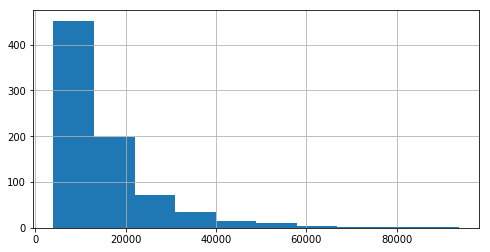

In [86]:
hist = df_neu['Zeichenzahl'].hist(bins=10, figsize=(8,4))

### Fazit: Der durchschnittliche Republik-Artikel ist fast 15 000 Zeichen lang. Der längste fast 100 000 Zeichen, 17 Artikel sind mehr als 50 000 Zeichen lang. 